LIMPEZA E TRANFORMAÇÃO DOS DADOS (PASSO A PASSO)


Aqui detalha-se todo o proceso de limpeza e transformação dos dados, para posterior modelação.

1. Importação de bibliotecas

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2. Carregar dataset original

In [66]:
df_origin = pd.read_csv("../Dataset/dnd_dataset.csv")
df_origin.head()

,Unnamed: 0,char_id,name,base_hp,stats_1,stats_2,stats_3,stats_4,stats_5,stats_6,...,class_starting_level,subclass_starting,class_other,subclass_other,total_level,feats,inventory,date_modified,notes_len,gold
0,0,1,Molster,8,11,22,11,17,20,12,...,4,NaN,NaN,NaN,4,NaN,Adamantine Chain Shirt/Cloak of Protection/Gog...,2022-09-12T19:13:03.29Z,17,305.00
1,1,3,Prailak,103,12,17,18,14,16,16,...,20,The Great Old One,NaN,NaN,20,"Spell Sniper (Bard, Sorcerer, Warlock)/Inferna...","Bag of Holding/Iron Flask/Studded Leather, +3/...",2021-12-07T21:25:36.9Z,60,0.00
2,2,8,Aurilanax,76,18,10,16,13,13,16,...,7,Oath of the Crown,NaN,NaN,7,NaN,Shield,2021-01-21T16:50:35Z,0,0.00
3,3,10,Gamndell Banglebon,127,10,14,16,16,15,18,...,2,NaN,Bard/Cleric/Wizard,School of Illusion,16,NaN,Give/Studded Leather/Dagger/Light Hammer/Ink (...,2020-08-06T16:05:07Z,65,4951.06
4,4,19,Bellek Bouncer,52,10,10,15,12,14,10,...,6,Life Domain,NaN,NaN,6,NaN,Shield/Plate/Mace/Potion of Healing,2020-05-15T04:47:59Z,0,0.00


3. Análise da estrutura geral do dataset

 Aqui observamos os tipos de dados, presença de valores nulos e descrição estatística inicial

In [67]:
#Estrutura geral e tipo de dados
df_origin.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204252 entries, 0 to 1204251
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1204252 non-null  int64  
 1   char_id               1204252 non-null  int64  
 2   name                  1199602 non-null  object 
 3   base_hp               1204252 non-null  int64  
 4   stats_1               1204252 non-null  int64  
 5   stats_2               1204252 non-null  int64  
 6   stats_3               1204252 non-null  int64  
 7   stats_4               1204252 non-null  int64  
 8   stats_5               1204252 non-null  int64  
 9   stats_6               1204252 non-null  int64  
 10  background            898870 non-null   object 
 11  race                  1204252 non-null  object 
 12  class_starting        1204252 non-null  object 
 13  class_starting_level  1204252 non-null  int64  
 14  subclass_starting     607804 non-n

In [68]:
# Estatistica descritiva do data set original
df_origin.describe()

,Unnamed: 0,char_id,base_hp,stats_1,stats_2,stats_3,stats_4,stats_5,stats_6,class_starting_level,total_level,notes_len,gold
count,1.204252e+06,1.204252e+06,1.204252e+06,1.204252e+06,1.204252e+06,1.204252e+06,1.204252e+06,1.204252e+06,1.204252e+06,1.204252e+06,1.204252e+06,1.204252e+06,1.204252e+06
mean,6.021255e+05,8.760689e+05,2.347389e+01,1.051853e+01,1.153501e+01,1.146815e+01,1.025950e+01,1.091329e+01,1.066623e+01,3.952510e+00,4.209893e+00,2.440385e+02,1.336151e+06
std,3.476378e+05,4.414356e+05,2.677593e+01,4.829688e+00,4.918547e+00,4.744150e+00,4.565985e+00,4.745979e+00,4.844946e+00,4.344063e+00,4.640197e+00,9.688915e+02,1.131455e+08
min,0.000000e+00,1.000000e+00,-6.240000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-3.264000e+04,0.000000e+00
25%,3.010628e+05,5.446485e+05,8.000000e+00,8.000000e+00,1.000000e+01,1.100000e+01,8.000000e+00,1.000000e+01,8.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,6.021255e+05,8.185030e+05,1.200000e+01,1.100000e+01,1.300000e+01,1.300000e+01,1.100000e+01,1.200000e+01,1.200000e+01,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
75%,9.031882e+05,1.188040e+06,2.900000e+01,1.400000e+01,1.500000e+01,1.400000e+01,1.300000e+01,1.400000e+01,1.400000e+01,5.000000e+00,5.000000e+00,5.300000e+01,2.500000e+01
max,1.204251e+06,1.988091e+06,5.000000e+02,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,2.000000e+01,3.400000e+01,3.259300e+04,2.052099e+10


In [69]:
df_origin.isnull().sum()

Unnamed: 0                    0
char_id                       0
name                       4650
base_hp                       0
stats_1                       0
stats_2                       0
stats_3                       0
stats_4                       0
stats_5                       0
stats_6                       0
background               305382
race                          0
class_starting                0
class_starting_level          0
subclass_starting        596448
class_other             1125438
subclass_other          1155418
total_level                   0
feats                    985244
inventory                371961
date_modified                 0
notes_len                     0
gold                          0
dtype: int64

In [70]:
df_origin.isna().sum()

Unnamed: 0                    0
char_id                       0
name                       4650
base_hp                       0
stats_1                       0
stats_2                       0
stats_3                       0
stats_4                       0
stats_5                       0
stats_6                       0
background               305382
race                          0
class_starting                0
class_starting_level          0
subclass_starting        596448
class_other             1125438
subclass_other          1155418
total_level                   0
feats                    985244
inventory                371961
date_modified                 0
notes_len                     0
gold                          0
dtype: int64

4. Verificação manual das colunas

In [71]:
df_origin.columns.to_list()

['Unnamed: 0',
 'char_id',
 'name',
 'base_hp',
 'stats_1',
 'stats_2',
 'stats_3',
 'stats_4',
 'stats_5',
 'stats_6',
 'background',
 'race',
 'class_starting',
 'class_starting_level',
 'subclass_starting',
 'class_other',
 'subclass_other',
 'total_level',
 'feats',
 'inventory',
 'date_modified',
 'notes_len',
 'gold']

5. Análise mais detalhada de coluna que achámos importantes

In [72]:
for col in df_origin.columns:
    print(f"Coluna: {col}")
    print("Tipo:", df_origin[col].dtype)
    print("Valores únicos:", df_origin[col].nunique())
    print(df_origin[col].value_counts(dropna=False).head(5))
    print("\n---\n")

Coluna: Unnamed: 0
Tipo: int64
Valores únicos: 1204252
Unnamed: 0
1204251    1
0          1
1          1
2          1
3          1
Name: count, dtype: int64

---

Coluna: char_id
Tipo: int64
Valores únicos: 511272
char_id
608449    6
608457    6
608464    6
608468    6
608475    6
Name: count, dtype: int64

---

Coluna: name
Tipo: object
Valores únicos: 393262
name
NaN      4650
Test     1206
Bob      1003
test      505
Varis     469
Name: count, dtype: int64

---

Coluna: base_hp
Tipo: int64
Valores únicos: 339
base_hp
8     216849
10    146653
0     107784
6      71225
12     65897
Name: count, dtype: int64

---

Coluna: stats_1
Tipo: int64
Valores únicos: 30
stats_1
8     200679
15    177714
10    149672
0     145239
12    120819
Name: count, dtype: int64

---

Coluna: stats_2
Tipo: int64
Valores únicos: 28
stats_2
15    212856
14    176525
13    169066
0     146583
12    122596
Name: count, dtype: int64

---

Coluna: stats_3
Tipo: int64
Valores únicos: 29
stats_3
14    264529
13   

In [73]:
#  Esta análise ajudou a identificar colunas com alto número de categorias (ex.: `background`),
#  colunas com muitos valores nulos (ex.: `class_other`, `subclass_other`),
#  colunas de texto irrelevantes (`name`, `feats`, `inventory`) 
# e colunas dependentes da classe (`subclass_starting`, `class_starting_level`), 
# permitindo decidir com base em observações concretas.

6. Eliminação de colunas irrelevantes ou possivélmente problemáticas, para o contexto do projecto.

In [74]:
df = df_origin.drop(columns=[
    'Unnamed: 0',         # indice duplicado
    'char_id', 'name',    # id's e nome irrelevantes 
    'subclass_starting', 'subclass_other', # dependem da classe , podem conter data leaks
    'feats', 'inventory', # depende da classe escolhida
    'date_modified', 'notes_len', # metadados irrelevantes
    'gold', # irrelevante pois é derivado de outras colunas
    'background' # correlacionado com a classe e pode conter data leaks
])

7. Renomear nomes das colunas

In [75]:
df = df.rename(columns={
    'stats_1': 'strength',
    'stats_2': 'dexterity',
    'stats_3': 'constitution',
    'stats_4': 'intelligence',
    'stats_5': 'wisdom',
    'stats_6': 'charisma',
    'race': 'race',
    'class_starting': 'class_starting',
    'class_starting_level': 'class_starting_level',
    'class_other': 'class_other',
    'total_level': 'total_level',
    'base_hp': 'base_hp'
})

In [76]:
list(df.columns)

['base_hp',
 'strength',
 'dexterity',
 'constitution',
 'intelligence',
 'wisdom',
 'charisma',
 'race',
 'class_starting',
 'class_starting_level',
 'class_other',
 'total_level']

8. Verificação dos tipos de dados ( novamente )

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204252 entries, 0 to 1204251
Data columns (total 12 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   base_hp               1204252 non-null  int64 
 1   strength              1204252 non-null  int64 
 2   dexterity             1204252 non-null  int64 
 3   constitution          1204252 non-null  int64 
 4   intelligence          1204252 non-null  int64 
 5   wisdom                1204252 non-null  int64 
 6   charisma              1204252 non-null  int64 
 7   race                  1204252 non-null  object
 8   class_starting        1204252 non-null  object
 9   class_starting_level  1204252 non-null  int64 
 10  class_other           78814 non-null    object
 11  total_level           1204252 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 110.3+ MB


In [78]:
# - 'classe' e 'race' estão como object. 
# Converter para 'category' para melhorar a performance.

In [79]:
df['class_starting'] = df['class_starting'].astype('category')
df['race'] = df['race'].astype('category')
df['class_other'] = df['class_other'].astype('category')

colunas_numericas = ['base_hp', 'strength', 'dexterity', 'constitution', 'intelligence', 'wisdom', 'charisma','class_starting_level', 'total_level']
colunas_stats = ['strength', 'dexterity', 'constitution', 'intelligence', 'wisdom', 'charisma']
df[colunas_numericas] = df[colunas_numericas].apply(pd.to_numeric)

9. Análise e limpeza de valores inválidos (colunas numéricas)

In [80]:
(df[colunas_numericas] <= 0).sum()

base_hp                 108047
strength                145239
dexterity               146583
constitution            147461
intelligence            147873
wisdom                  147875
charisma                147813
class_starting_level         0
total_level                  0
dtype: int64

In [81]:
# Atributos com valor <=0 são inválidos no D&D 5e. HP negativo também foi identificado já no ponto 2 e foi removido.
df = df[(df[colunas_numericas] > 0).all(axis=1)]
(df[colunas_numericas] <= 0 )

#remover linahs da coluna 'total_level' com valor > 20
df = df[df['total_level'] <= 20]

# Filtrar nas colunas de stats valores > 20
df = df[(df[colunas_stats] <= 20).all(axis=1)]
#Filtrar nas colunas stats valores >=3
df = df[(df[colunas_stats] >= 3).all(axis=1)]






In [82]:
df[colunas_numericas].describe()

,base_hp,strength,dexterity,constitution,intelligence,wisdom,charisma,class_starting_level,total_level
count,979774.000000,979774.000000,979774.000000,979774.000000,979774.000000,979774.000000,979774.000000,979774.000000,979774.000000
mean,26.664390,11.935367,13.111473,13.050568,11.671199,12.425593,12.130148,4.162315,4.468139
std,27.390858,3.027967,2.544125,2.161796,2.629042,2.570571,2.921360,4.439116,4.768886
min,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000
25%,8.000000,10.000000,12.000000,12.000000,10.000000,10.000000,10.000000,1.000000,1.000000
50%,16.000000,12.000000,13.000000,13.000000,12.000000,13.000000,12.000000,3.000000,3.000000
75%,34.000000,15.000000,15.000000,14.000000,14.000000,14.000000,15.000000,5.000000,6.000000
max,500.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000


10. Distribuição da variávél alvo 'class' 

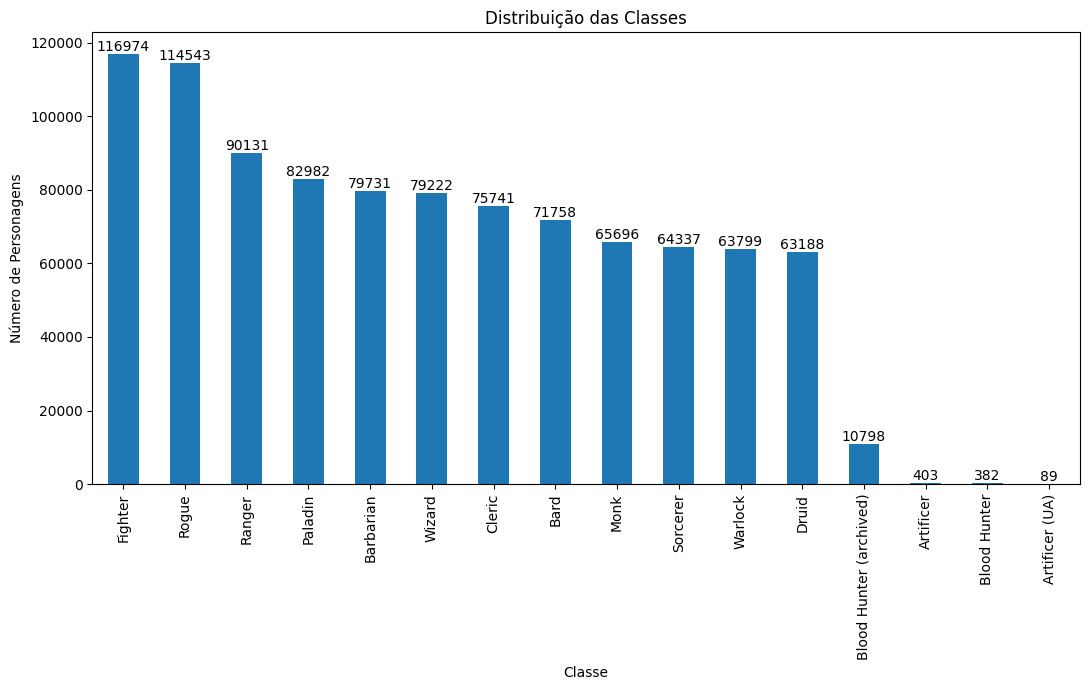

In [83]:
plt.figure(figsize=(11,7))
ax = df['class_starting'].value_counts().plot(kind='bar')
plt.title('Distribuição das Classes')
plt.xlabel('Classe')
plt.ylabel('Número de Personagens')
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')
plt.tight_layout()
plt.show()

In [84]:
# Tabela de classes e número de personagens:
tabela_classes = df['class_starting'].value_counts().reset_index()
tabela_classes.columns = ['Class_staring', 'Número de Personagens']
print(tabela_classes)

              Class_staring  Número de Personagens
0                   Fighter                 116974
1                     Rogue                 114543
2                    Ranger                  90131
3                   Paladin                  82982
4                 Barbarian                  79731
5                    Wizard                  79222
6                    Cleric                  75741
7                      Bard                  71758
8                      Monk                  65696
9                  Sorcerer                  64337
10                  Warlock                  63799
11                    Druid                  63188
12  Blood Hunter (archived)                  10798
13                Artificer                    403
14             Blood Hunter                    382
15           Artificer (UA)                     89


In [85]:
# Verifica-se que existem 16 classes diferentes, embora Blood Hunter e Artificer sejam subclasses de outras classes, estejam divididos em 4 classes.
#Iremos agrupar Blood Hunter com Blood Hunter (archived) e Artificier com Artificier (UA)

11. Normalizar 'class'

In [86]:
#Lista de classes oficiais
classes_oficiais = [
    "Barbarian", "Bard", "Cleric", "Druid", "Fighter", "Monk",
    "Paladin", "Ranger", "Rogue", "Sorcerer", "Warlock", "Wizard", "Artificer", "Blood Hunter"
]

In [87]:

# Valores únicos no dataset
classes_dataset = set(df['class_starting'].unique())

# Quais classes oficiais estão no dataset?
presentes = [c for c in classes_oficiais if c in classes_dataset]
faltam = [c for c in classes_oficiais if c not in classes_dataset]

print("Classes oficiais presentes no dataset:", presentes)
print("Classes oficiais em falta no dataset:", faltam)

Classes oficiais presentes no dataset: ['Barbarian', 'Bard', 'Cleric', 'Druid', 'Fighter', 'Monk', 'Paladin', 'Ranger', 'Rogue', 'Sorcerer', 'Warlock', 'Wizard', 'Artificer', 'Blood Hunter']
Classes oficiais em falta no dataset: []


In [97]:
# Agrupar Artificer e Blood Hunter
df['class_starting'] = df['class_starting'].replace({
    'Artificer (UA)': 'Artificer',
    'Blood Hunter (archived)': 'Blood Hunter',

})

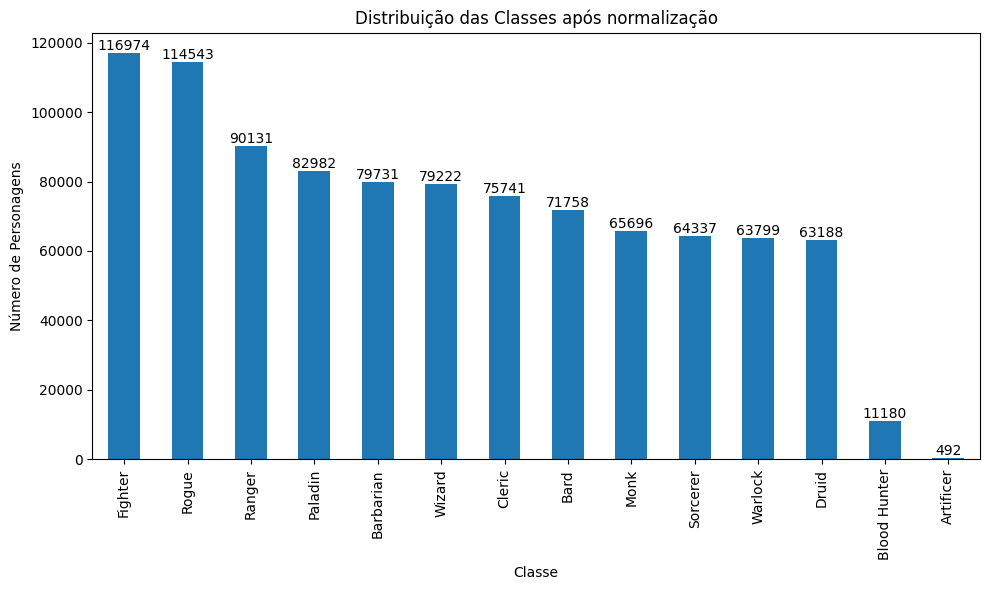

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
ax = df['class_starting'].value_counts().plot(kind='bar')
plt.title('Distribuição das Classes após normalização')
plt.xlabel('Classe')
plt.ylabel('Número de Personagens')
plt.tight_layout()

# Adiciona o número exato em cima de cada barra
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

In [90]:
# NOTA IMPRTANTE: usar class_weight='balanced' no modelo para lidar com o desbalanceamento de classes!

12. Normalização da 'race'

In [91]:
# A transformação da variável 'race' será realizada após definição de estratégia de verificaão com recurso a nova tabela conseguida por webscrapping.


13. Avaliação final ( ultima verificação)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 979774 entries, 1 to 1204250
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   base_hp               979774 non-null  int64   
 1   strength              979774 non-null  int64   
 2   dexterity             979774 non-null  int64   
 3   constitution          979774 non-null  int64   
 4   intelligence          979774 non-null  int64   
 5   wisdom                979774 non-null  int64   
 6   charisma              979774 non-null  int64   
 7   race                  979774 non-null  category
 8   class_starting        979774 non-null  category
 9   class_starting_level  979774 non-null  int64   
 10  class_other           75759 non-null   category
 11  total_level           979774 non-null  int64   
dtypes: category(3), int64(9)
memory usage: 79.5 MB


In [93]:
df.describe()

,base_hp,strength,dexterity,constitution,intelligence,wisdom,charisma,class_starting_level,total_level
count,979774.000000,979774.000000,979774.000000,979774.000000,979774.000000,979774.000000,979774.000000,979774.000000,979774.000000
mean,26.664390,11.935367,13.111473,13.050568,11.671199,12.425593,12.130148,4.162315,4.468139
std,27.390858,3.027967,2.544125,2.161796,2.629042,2.570571,2.921360,4.439116,4.768886
min,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000
25%,8.000000,10.000000,12.000000,12.000000,10.000000,10.000000,10.000000,1.000000,1.000000
50%,16.000000,12.000000,13.000000,13.000000,12.000000,13.000000,12.000000,3.000000,3.000000
75%,34.000000,15.000000,15.000000,14.000000,14.000000,14.000000,15.000000,5.000000,6.000000
max,500.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000


In [94]:
df.isnull().sum()

base_hp                      0
strength                     0
dexterity                    0
constitution                 0
intelligence                 0
wisdom                       0
charisma                     0
race                         0
class_starting               0
class_starting_level         0
class_other             904015
total_level                  0
dtype: int64

In [95]:
from random import randint
df.head(randint(0,1204250))

,base_hp,strength,dexterity,constitution,intelligence,wisdom,charisma,race,class_starting,class_starting_level,class_other,total_level
1,103,12,17,18,14,16,16,Tiefling,Warlock,20,NaN,20
2,76,18,10,16,13,13,16,Bugbear,Paladin,7,NaN,7
3,127,10,14,16,16,15,18,Gnome,Warlock,2,Bard/Cleric/Wizard,16
4,52,10,10,15,12,14,10,Half-Orc,Cleric,6,NaN,6
5,41,15,8,14,16,13,16,Firbolg,Monk,5,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...
418929,10,14,10,8,12,15,13,Elf,Ranger,1,NaN,1
418930,10,12,10,14,8,8,14,Dwarf,Fighter,1,NaN,1
418931,19,14,15,12,13,8,10,Tiefling,Barbarian,2,NaN,2
418932,18,8,12,10,15,11,16,Elf,Bard,3,NaN,3


14. Exportação de dataset limpo para trabalho de modelação

In [96]:
df.to_csv("../Dataset/dnd_dataset_cleanned.csv", index=False)